In [1]:
##################################################################################
## Script for extracting sequential patterns
## from data associated to trajectories of
## locations (visits) in Lille city, France
##################################################################################
## This program is free software: you can redistribute it and/or modify
## it under the terms of the GNU General Public License as published by
## the Free Software Foundation, either version 3 of the License, or
## (at your option) any later version.
## This program is distributed in the hope that it will be useful,
## but WITHOUT ANY WARRANTY; without even the implied warranty of
## MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
## GNU General Public License for more details.
## You should have received a copy of the GNU General Public License
## along with this program.  If not, see <https://www.gnu.org/licenses/>.
##################################################################################
## Author: Hugo Alatrista-Salas
## Copyright: Copyright 2023, Data Turism & MEL Project (Research center ESILV)
## Credits: [Hugo Alatrista-Salas]
## License: GPL
## Version: 1.0.1
## Mmaintainer: [Hugo Alatrista-Salas]
## Email: hugo.alatrista_salas@devinci.fr
## Status: Proof of concept
##################################################################################

## Building graphs using iGraph, Nertworkit and NetworkX packages 

In [18]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Basic Librariess
import numpy as np
import pandas as pd

### Our own libraries 
from sources import tpm_graphs
from sources import tpm_spm 
from sources import tpm_visu 
from sources import tpm_walk 
from sources import tpm_metrics 
from sources import tpm_powlaw 
from sources import tpm_traversal 

### Other libraries
import warnings
warnings.filterwarnings('ignore')


In [19]:
### Data recovering and graph buiding
### We use three libraries for buiding the graph and test different path extraction techniques (like BFS, A*, Dijkstra)

path_edges = "data/MEL_circulationGraph_0.csv"
path_vertices = "data/MEL_tripLocation.csv"
vertices, edges = read_files(path_edges, path_vertices)
big_graph = building_graph_ig(vertices, edges)
gi = graph_simplify(big_graph.copy())
gx = building_graph_nx(gi)
gk = building_graph_nk(gi)

In [23]:
big_graph.summary()

'IGRAPH D--- 3317 94829 -- \n+ attr: HotelNoteQualitePrix (v), activiteSubCategorie (v), activiteSubType (v), activiteType (v), adresse (v), ap_additional_info (v), ap_age_band_list (v), ap_attraction_ids (v), ap_booking_question_list (v), ap_bubble_rating_integer (v), ap_duration (v), ap_exclusion (v), ap_inclusions (v), ap_introduction (v), ap_primary_supplier_attraction_id (v), ap_primary_supplier_subtype (v), ap_primary_ta_geo_id (v), ap_product_code (v), ap_product_highlights (v), ap_product_text (v), ap_raw (v), closed (v), dateLastScanReviews (v), fromId (v), gadm36_gid (v), hotelBookingID (v), hotelNoteEmplacement (v), hotelNoteProprete (v), hotelNoteService (v), hotelRoomNumber (v), hotelStars (v), hotelStyle (v), hotelType (v), hotelbearing (v), hoteldistance (v), hotelprice (v), id (v), idTrip (v), latitude (v), longitude (v), nbAvis (v), nbAvisRecupere (v), nbScanReview (v), nom (v), priceRange (v), rating (v), restaurantDietaryRestrictions (v), restaurantFeatures (v), rest

In [24]:
### Verifying the correct construction of vertices

vertices[vertices['id'] == 793722]

,id,idTrip,fromId,nom,url,rating,nbAvis,nbAvisRecupere,latitude,longitude,...,ap_exclusion,ap_inclusions,ap_introduction,ap_primary_supplier_attraction_id,ap_primary_supplier_subtype,ap_primary_ta_geo_id,ap_product_code,ap_product_highlights,ap_product_text,ap_raw
130,793722,187178.0,NaN,La Chicoree,https://www.tripadvisor.co.uk/Restaurant_Revie...,3.390589,3596,3599.0,50.63596,3.063038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extracting the traversal sequences by diferent techniques and libraries

In [27]:
### Extracting five paths lists using different libraries and approaches
### Note that, GI, GK and GX represent the same graph
### We test 6 techniques/libraries 'nk_a', 'nk_bfs', 'nk_dij', 'nx_dij', 'nx_shor', 'ni_dij'
### Results are a list of list. Each list has the form: [name_lib/tech, execution_time, nb_paths, list_paths]

start = 0 # Main square of Lille
end = gi.vcount() # All other locations in the graph
lst_paths_by_lib = extraction_paths_from_graph(gi, gk, gx, start, end)

In [28]:
### Showing some columns of the resulting matrix (0: names, 1: time, 2: size, 3: list of paths)

[x[2] for x in lst_paths_by_lib]

[2172, 2310, 2310, 2311, 2311, 2310]

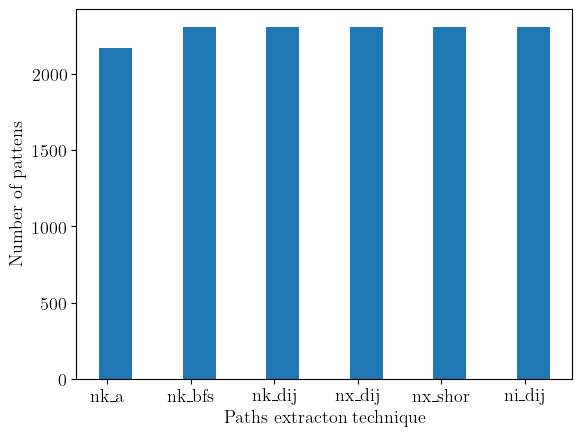

In [31]:
### Plotting the number of paths by path extraction technique

hysto_traversal_nb_patt(lst_paths_by_lib)

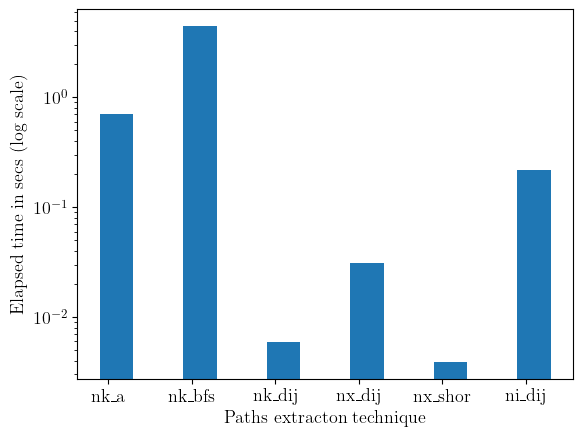

In [30]:
### Plotting the elapsed time (in sec) by path extraction technique

hysto_traversal_time(lst_paths_by_lib)

## Comparison of SPM (nb of patterns and elapesed time) for diferent traversal techniques

In [15]:
### Building sequences from traversals
### This is perfeorme only by the Seq2Pat algorithm

lst_p2s = recovering_id_set_paths(lst_paths_by_lib, big_graph)
lst_p2s

[['nk_a', <sequential.seq2pat.Seq2Pat at 0x7f82d4c80400>],
 ['nk_bfs', <sequential.seq2pat.Seq2Pat at 0x7f82b9757700>],
 ['nk_dij', <sequential.seq2pat.Seq2Pat at 0x7f82d0c8ac70>],
 ['nx_dij', <sequential.seq2pat.Seq2Pat at 0x7f82b9783910>],
 ['nx_shor', <sequential.seq2pat.Seq2Pat at 0x7f82d0c81ee0>],
 ['ni_dij', <sequential.seq2pat.Seq2Pat at 0x7f82b978ad30>]]

In [16]:
### Building a list containing the number of pattens and the execution time 
### for multimple minimal support and traversal extraction techniques 

#supp_min_max = len(lst_paths_by_lib[0][3]) # The number of paths for one of techniques
supp_min_max = 200
supp_min_min = 10
step = 10
lst_supp_patt = stat_supp_patt_by_traversal(lst_p2s, supp_min_max, supp_min_min, step, big_graph)
##lst_supp_patt

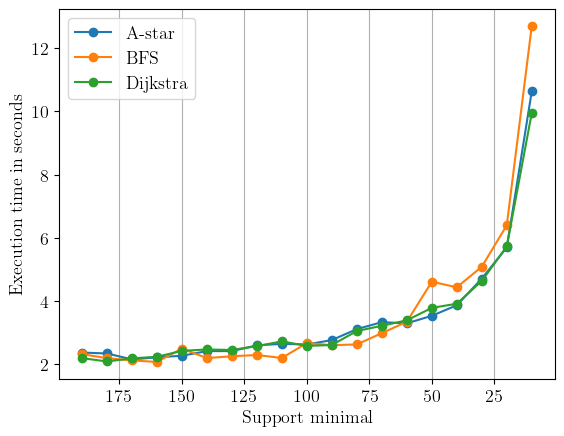

In [33]:
### Plotting the elapsed time by support and by paht extraction technique

time_by_supp_patt_by_pathtech_latex(lst_supp_patt)

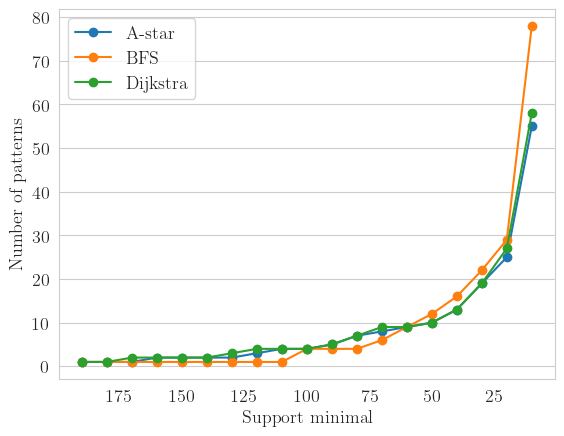

In [20]:
### Plotting the number of patterns by support and by paht extraction technique

nbpatt_by_supp_patt_by_pathtech_latex(lst_supp_patt)

## Extraction of Sequential pattens for a specific minimal support for metrics construction

In [34]:
### For extracting all metrics, we fix the minimal support

supp_min = 10

In [35]:
### We calculate the sequential patterns (Seq2Pat) for list of paths extracted by technique 
### This is used for plot the size of patterns by path extaction technique

list_all_patt_stat = stat_supp_patt_by_traversal_min_supp(lst_p2s, supp_min, big_graph)

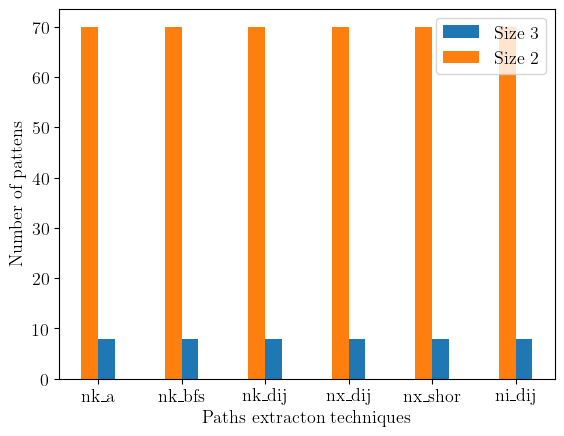

In [36]:
### Plotting the size of patterns by paht extraction technique

hysto_traversal_nb_patt_by_path_tech(list_all_patt_stat)

In [37]:
### Transformig the list of path_tech -> pattenrs into a dataframe of patterns
### The fist column of the list correspond to the path_tech: 'nk_a', 'nk_bfs', 'nk_dij', 'nx_dij', 'nx_shor', 'ni_dij' [0, 1, 2, 3, 4, 5] respectively
### The second column correspond to pattenrs, including their support [1]
### This new dataframe is used for metric caltulation

patt_tobe_annalysed = list2dataframe(list_all_patt_stat[1][1]) # [1][1] for bfs 
##patt_tobe_annalysed

## Extracting metrics for patterns extracted using a specific traversal method and a minimal support

In [38]:
### Getting data from calcul of distance using OSM. We need a list of sequential pattens and the original graph
### First, we need to transform the data into a OSM format
### CAUTION: execute the osm.ipynb for osm-based distance (it takes some time)
### It take as the input the list_geo_point and save results in a file with distances in Km

list_geo_points = conver_list_ints_osm(getLatLongFromGraph(patt_tobe_annalysed, big_graph))
save_list_osm('file_geo_seq.csv', list_geo_points)

In [39]:
### Metrics calculation from sequential patterns extractng with a specific traversal method (BFS)
### File file_geo_dist_all.csv is stored as file_geo_dist_all_BKP.csv for avoid recalculate the paths

df_metrics = getMetrics(patt_tobe_annalysed.copy(), big_graph)
df_metrics.replace([np.inf, -np.inf], 0, inplace=True) ## replace possible "inf" values by 0

In [32]:
df_metrics.tail(50)

,patterns,supp,CDP,CDP_all,PSI,LDI,PPI,communes,granularity,DDI,NDI_V2,typeR,Nationality
28,"[196911, 251421]",20,7.212598,7.542928,3.895820,0.000000,0.007299,"[LILLE-LOMME-HELLEMMES, COURONNE SUD DE LILLE]",coarse,0.132575,0.888889,"[H, H]",[[France]]
29,"[196911, 808452]",18,0.621544,1.264713,3.948553,1.000000,0.004854,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,2.149327,0.777778,"[H, R]","[[Belgium, United Kingdom]]"
30,"[196911, 13387436]",18,0.573872,1.139109,3.749570,1.000000,0.002421,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,2.386323,0.888889,"[H, A]",[[Belgium]]
31,"[196911, 196912, 784053]",17,1.199670,1.279824,3.880981,0.918296,0.009050,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES,...",fine,1.957314,0.702742,"[H, H, R]","[[United Kingdom, France, Germany, Belgium], [..."
32,"[196911, 275111]",17,1.883261,1.843299,3.809685,0.000000,0.009756,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,0.542506,0.814815,"[H, H]","[[France, United Kingdom]]"
33,"[196911, 800978]",17,0.792157,1.506374,3.987850,1.000000,0.004854,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,1.804520,0.888889,"[H, R]",[[France]]
34,"[196911, 3741320]",17,1.044729,1.847021,4.063830,1.000000,0.002421,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,1.471711,0.888889,"[H, R]",[[France]]
35,"[196912, 784053]",17,0.454550,0.459928,3.906386,1.000000,0.009050,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,5.910233,0.698413,"[H, R]","[[France, United Kingdom, The Netherlands]]"
36,"[196911, 236901]",16,3.372947,3.721668,3.701022,0.000000,0.002421,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,0.268697,0.888889,"[H, H]",[[France]]
37,"[196911, 232406]",15,1.644731,1.632309,3.824556,0.000000,0.035000,"[LILLE-LOMME-HELLEMMES, LILLE-LOMME-HELLEMMES]",fine,0.612629,0.722222,"[H, H]","[[France, United Kingdom, Belgium]]"


## Using Prefixspan for differents path extraction techniques

In [43]:
### Prefixspan classic (Han et al.)

end = timer()
time_patt_Seq2pat = (end - start)
sup_min = 10
patt_Prefixspan = extract_patt_PrefixSpan(lst_paths_by_lib, big_graph, sup_min)
end = timer()
time_patt_Prefix = (end - start)

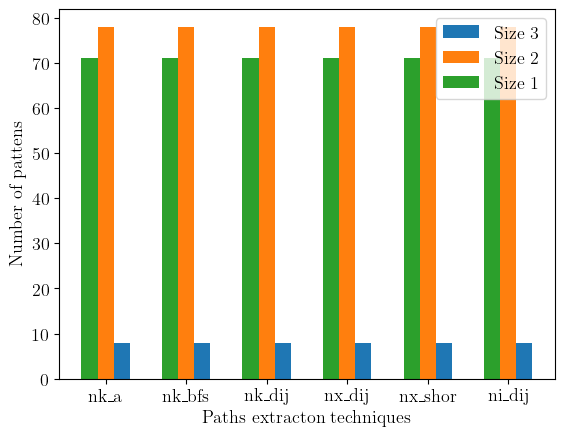

In [44]:
### Plotting the number of patterns extracted by Prefixspan by paht extraction technique

hysto_traversal_nb_patt_by_path_tech_PrefixSpan(patt_Prefixspan)

## Comparison of sequential pattern mining techniques

In [45]:
### Function for extracting frequent sequences using Spam
### input: sequnces of locations, a minimal support (minsup)
### output: patterns appearing at least minsup times
### Note: TO BE TESTED (we can see the sequences support)

def extract_patt_Spam1(lst_paths_by_lib, min_supp):
    list_patt_2_spamAlgo = []
    for list in lst_paths_by_lib[1][3]:
        list_of_lists = [[item] for item in list]
        list_patt_2_spamAlgo.append(list_of_lists)
    start = timer()
    algo = SpamAlgo(min_supp)
    algo.spam(list_patt_2_spamAlgo)
    patts = algo.frequent_items
    end = timer()
    time_patt_Spam = (end - start)
    print(time_patt_Spam)
    return patts

In [39]:
### Computing the execution time used by Span algorithm

start = timer()
sup_min = 0.0039 # ~ 10
res_span = extract_patt_Spam1(lst_paths_by_lib, sup_min)
end = timer()
time_patt_Spam = (end - start)
print(time_patt_Spam)
print(len(res_span))

Min support 10
0.9856505000000197
157


In [40]:
### Computing the execution time used by Span algorithm

supp_min = 10
p2s = recovering_id(lst_paths_by_lib[1][3],big_graph)
start = timer()
ps = PrefixSpan(p2s)
results = ps.frequent(supp_min)
end = timer()
time_patt_Prefix = (end - start)
print(time_patt_Prefix)
print(len(results))

0.010932292000006782
157


In [41]:
### Showing some columns of the resulting matrix (0: name of techniques, 1: min support, 2: number of patterns, 3: elapsed time)

print([x[3] for x in lst_supp_patt][1]) 
print([x[2] for x in lst_supp_patt][1]) #for results of Seq2Pat on BFS technique 

11.978228582999996
78
